## Import

In [1]:
# ======================================================
# TA-Lib
import talib

# ======================================================
# basic library
import warnings

import openpyxl
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

import time
import math
import os
import os.path
import random
import shutil
import glob

# ======================================================
# tqdm
from tqdm import tqdm

# ======================================================
# datetime
from datetime import timedelta, datetime

# ======================================================
# plotting library
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter, MonthLocator

import seaborn as sns

import plotly.graph_objects as go
import plotly.subplots as ms
import plotly.express as px

import mplfinance as fplt
from mplfinance.original_flavor import candlestick2_ohlc, volume_overlay

from PIL import Image

import cv2
import csv

# plt.rcParams['figure.dpi'] = 150
from IPython.display import clear_output

## Stock Index Futures Data Preprocessing

In [2]:
stock_data = pd.read_csv('./csv/1_origin_csv/origin_full_data.csv')

In [4]:
# 'time' 열을 datetime 형태로 변환
stock_data['time'] = pd.to_datetime(stock_data['time'])

# 날짜별로 행의 수 계산
daily_counts = stock_data.groupby(stock_data['time'].dt.date).size()

print(daily_counts)

time
2022-02-10    396
2022-02-11    396
2022-02-14    396
2022-02-15    396
2022-02-16    396
             ... 
2024-12-23    411
2024-12-24    411
2024-12-26    411
2024-12-27    411
2024-12-30    411
Length: 708, dtype: int64


In [5]:
unique_values = daily_counts.unique()
print("Unique values:", unique_values)

Unique values: [396 380 336 411 395 351 382]


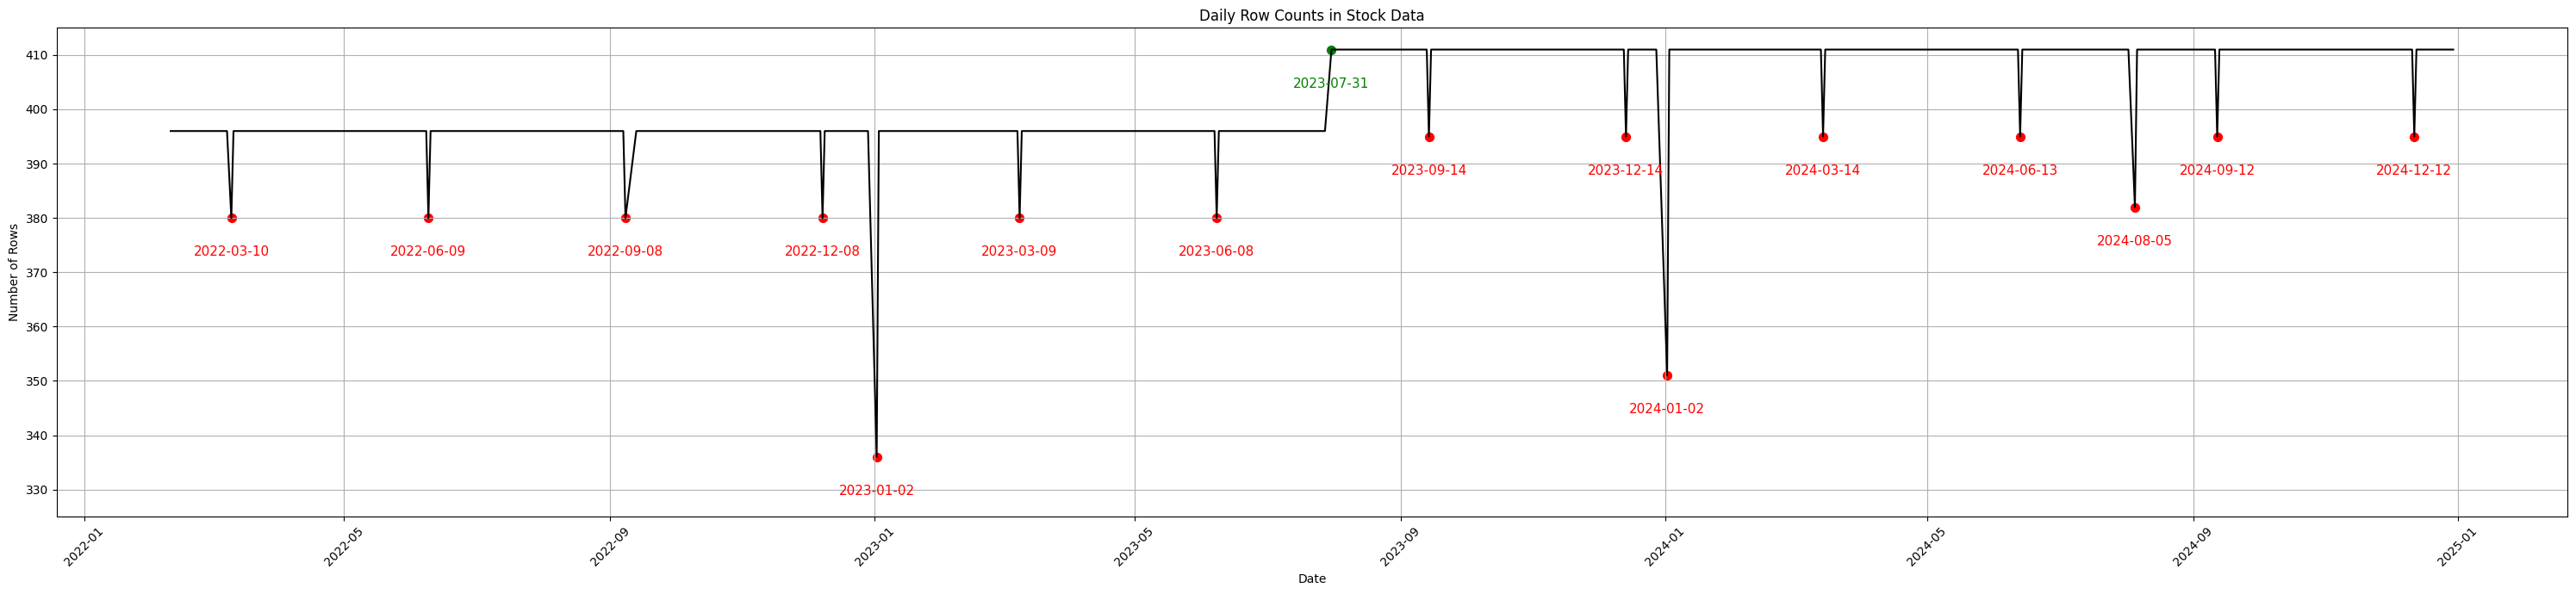

In [6]:
# daily_counts 데이터 시각화
plt.figure(figsize=(30, 7))
plt.plot(daily_counts.index, daily_counts.values, linestyle='-', color = 'black')

# 특정 행의 개수가 나타난 날짜를 강조
highlight_counts = [380, 336, 395, 351, 382]
for count in highlight_counts:
    highlight_dates = daily_counts[daily_counts == count].index
    for date in highlight_dates:
        plt.scatter(date, count, color='red', s=50)  # 각 날짜에 빨간색 점으로 표시
        plt.text(date, count - 7, f'{date.strftime("%Y-%m-%d")}', color='red', ha='center', fontsize=11)

# 396개에서 411개로 변경된 첫 날짜 찾기
first_change_date = daily_counts[(daily_counts.shift(1) == 396) & (daily_counts == 411)].index[0]
plt.scatter(first_change_date, 411, color='green', s=50)  # 변경점을 초록색 점으로 표시
plt.text(first_change_date, 411 - 7, f'{first_change_date.strftime("%Y-%m-%d")}', color='green', ha='center', fontsize=11)

# 그래프 설정
plt.xlabel('Date')
plt.ylabel('Number of Rows')
plt.title('Daily Row Counts in Stock Data')
plt.grid(True)
plt.xticks(rotation=45)  # 날짜 레이블을 45도 회전
plt.ylim(325, 415)  # Y축의 범위 설정
plt.tight_layout()  # 레이아웃 조정

plt.show()

In [ ]:
current_df = pd.read_csv('./csv/1_origin_csv/60_5/trend.csv')
future_df = pd.read_csv('./csv/1_origin_csv/60_5/future.csv')

trend
down            19802
up              19723
sideway_up       3993
sideway_down     3891
Name: count, dtype: int64


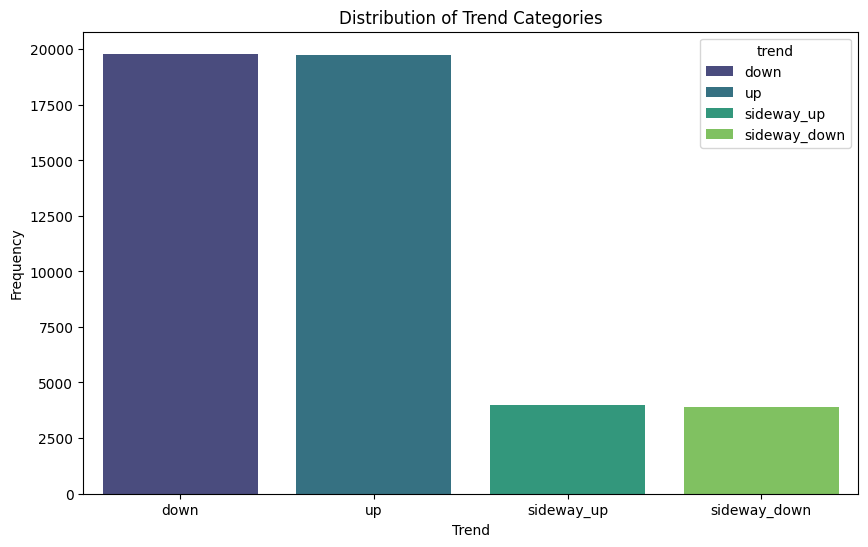

In [17]:
trend_count = current_df['trend'].value_counts()
print(trend_count)

plt.figure(figsize=(10, 6))
sns.barplot(x=trend_count.index, y=trend_count.values, hue=trend_count.index, palette='viridis', legend=True)
plt.title('Distribution of Trend Categories')
plt.xlabel('Trend')
plt.ylabel('Frequency')
plt.show()